<a href="https://colab.research.google.com/github/Wal14ber/An-lise_de_Consumo-_de_Drinks_por_Estabelecimento/blob/main/ANALISE_DADOS_BAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ENVIAR ARQUIVO PRO COLAB
from google.colab import files


In [2]:
#ESCOLHENDO ARQUIVOS
uploaded = files.upload()



Saving dados.xlsx to dados.xlsx


In [3]:
#IMPORTAR OS DADOS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#ler as tabelas do excel
df1 = pd.read_excel('dados.xlsx', sheet_name='Por Canal')
df1.head()


,Estabelecimento,Data,Dia,Modo,Integração,Tabela Preço,N.Pessoas
0,JAPPA DA QUITANDA - ANÁLIA FRANCO,2025-08-01,Sexta,Salão,0,0,201
1,JAPPA DA QUITANDA - ANÁLIA FRANCO,2025-08-02,Sábado,Salão,0,0,266
2,JAPPA DA QUITANDA - ANÁLIA FRANCO,2025-08-03,Domingo,Salão,0,0,234
3,JAPPA DA QUITANDA - ANÁLIA FRANCO,2025-08-04,Segunda,Salão,0,0,231
4,JAPPA DA QUITANDA - ANÁLIA FRANCO,2025-08-05,Terça,Salão,0,0,213


In [8]:
# tabela com consumo de produtos
df2 = pd.read_excel('dados.xlsx', sheet_name ='Consumo de Produtos')
df2.head()


,Estabelecimento,Cod.,Categoria,Descrição,Quant.,T. Categoria
0,JAPPA DA QUITANDA - ANÁLIA FRANCO,2000,RENTRADA,R SUNOMONO,0,RODIZIO
1,JAPPA DA QUITANDA - ANÁLIA FRANCO,2001,RENTRADA,R CAMARAO CATUPIRY,0,RODIZIO
2,JAPPA DA QUITANDA - ANÁLIA FRANCO,2002,RENTRADA,R CROQUETA SALMAO TERIYAKI,0,RODIZIO
3,JAPPA DA QUITANDA - ANÁLIA FRANCO,2003,R PRATOS QUENTES,R MIX DE COGUMELOS,0,RODIZIO
4,JAPPA DA QUITANDA - ANÁLIA FRANCO,2004,RENTRADA,R TEMPURA LEGUMES,0,RODIZIO


In [9]:
#ver nomes das abas das planilhas
xls = pd.ExcelFile('dados.xlsx')
print(xls.sheet_names)

['Por Canal', 'Consumo de Produtos']


In [11]:
#filtar apenas drinks
df2 = df2[df2['Categoria'].isin(['DRINKS','SOFT DRINKS'])]
df2.head()


,Estabelecimento,Cod.,Categoria,Descrição,Quant.,T. Categoria
158,JAPPA DA QUITANDA - ANÁLIA FRANCO,3103,SOFT DRINKS,AGUA COM GAS,267,SOFT DRINKS
159,JAPPA DA QUITANDA - ANÁLIA FRANCO,3104,SOFT DRINKS,AGUA SEM GAS,318,SOFT DRINKS
160,JAPPA DA QUITANDA - ANÁLIA FRANCO,3105,SOFT DRINKS,COCA COLA,272,SOFT DRINKS
161,JAPPA DA QUITANDA - ANÁLIA FRANCO,3106,SOFT DRINKS,COCA COLA ZERO,281,SOFT DRINKS
162,JAPPA DA QUITANDA - ANÁLIA FRANCO,3107,SOFT DRINKS,GUARANA ANTARCTICA,257,SOFT DRINKS


In [13]:
#total de pessoas por estabelecimento
n_pessoas = df1.groupby('Estabelecimento')['N.Pessoas'].sum()
n_pessoas

,N.Pessoas
Estabelecimento,
JAPPA DA QUITANDA - ANÁLIA FRANCO,13088
JAPPA DA QUITANDA - BARRA SHOPPING,26563


In [14]:
#QUANTIDADE TOTAL VENDIDA POR ESTABELECIMENTO E CATEGO.
quant = df2.groupby(['Estabelecimento','Categoria'])['Quant.'].sum()
quant


,,Quant.
Estabelecimento,Categoria,
JAPPA DA QUITANDA - ANÁLIA FRANCO,SOFT DRINKS,9433
JAPPA DA QUITANDA - BARRA SHOPPING,SOFT DRINKS,28408


In [15]:
#quantidade por pessoa
quant_por_pessoa = quant / n_pessoas
quant_por_pessoa


,,0
Estabelecimento,Categoria,
JAPPA DA QUITANDA - ANÁLIA FRANCO,SOFT DRINKS,0.720737
JAPPA DA QUITANDA - BARRA SHOPPING,SOFT DRINKS,1.069458


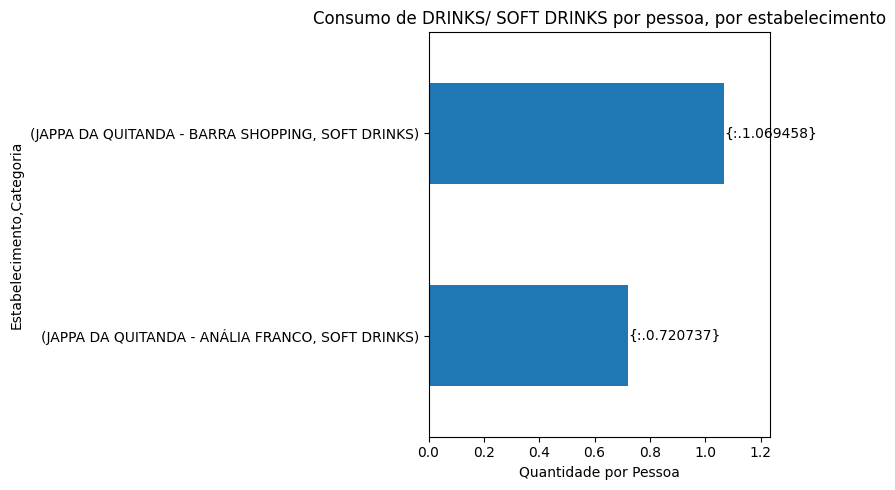

In [16]:
#grafico quantidade por pessoa
ax = quant_por_pessoa.plot.barh(figsize=(8,5))

#colocar rotulos com valores
ax.bar_label(ax.containers[0], fmt='{:.%2f}')

#dar espaçinho no eixo x
ax.set_xlim(0, ax.get_xlim()[1]* 1.1)

ax.set_xlabel('Quantidade por Pessoa')
ax.set_title('Consumo de DRINKS/ SOFT DRINKS por pessoa, por estabelecimento')
plt.tight_layout()
plt.show()


In [29]:
# top 5 produtos por loja e categoria

top5 = df2.groupby(['Estabelecimento', 'T. Categoria', 'Descrição' ])['Quant.'].sum()

#ordenar do maior para o menor
top5 = top5.sort_values(ascending=False)

#pegar os 5 primeiros de cada(Estabelecimento,T.Categoria)
top5 = top5.groupby(['Estabelecimento','T. Categoria']).head(5)

#ordenar por indice para ficar organizado
top5 = top5.sort_index()
top5

Estabelecimento                     T. Categoria  Descrição         
JAPPA DA QUITANDA - ANÁLIA FRANCO   SOFT DRINKS   CAFE DESCAFEINADO      349
                                                  MATE DO CHEPH          681
                                                  MATE MULE              333
                                                  SCHWEPPES CITRUS       595
                                                  SPRITE LEMON FRESH    1153
JAPPA DA QUITANDA - BARRA SHOPPING  SOFT DRINKS   AGUA COM GAS          3799
                                                  AGUA DA CASA          2334
                                                  AGUA SEM GAS          2710
                                                  COCA COLA             2053
                                                  COCA COLA ZERO        7551
Name: Quant., dtype: int64